## Procedural Sketches

In [1]:
## Prelude
#------------------------

using Images, Colors, Lazy, StaticArrays;

function LAB➜RGB(color)
    convert(RGB{Float64}, Lab(color...))::RGB{Float64}
end


function createImage(shader::Function, w=400, h=400)
    img = Array{RGB{Float64}, 2}(undef, h, w)
	@Threads.threads for j=h:-1:1
		for i=1:w
			img[h-j+1,i] = LAB➜RGB(shader(i,j,w,h))
		end
	end
	img
end
nothing

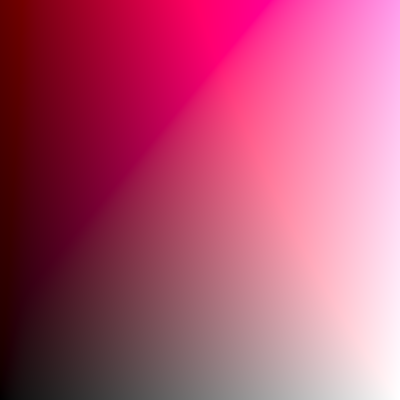

In [2]:
## small steps
function sweep(hue) 
    hr = deg2rad(hue) 
    c  = cos(hr)
    s  = sin(hr)
    (i,j,w,h) -> [100*i/w, 100*j/h*c, 100*j/h*s]
end
    
createImage(sweep(7)) 


In [3]:
using HypertextLiteral
using Base64
f = createImage(sweep(7)) 
function data_url(f)
    io = IOBuffer();
    write(io,"data:image/png;base64,")
    iob64 = Base64EncodePipe(io)
    show(iob64, "image/png", f)
    String(take!(io))
end

data_url (generic function with 1 method)

In [4]:
data_url(f)

"" ⋯ 103968 bytes ⋯ "ePCNGjBg5S4wY+ZRnxIhRnhEjRnlGjJwlRoycESNniZGzxIg5MWJOjJgTI4bEyFli5CwxJ0bOEiNnxJAYOSOGxMgZOUvMiZEzcpaYE/MUI2fJWWJIzIl5ipEzckbOkrPkLDlLzpKz5Cw5S86Ss+QsOUvOkjNy5sQ8xZyYk7PkLDlzYp5iTs6SszwxTzEkZ8mZE3Nylpx5iiE5yxNzcpYn5ilnyZmnnOWJecpZnpiTszwxJGeecv4FNKiYCKZG4TkAAAAASUVORK5C"

MarkdownLiteral.CMParsedRenderer(Info
========
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZAAAAGQCAIAAAAP3aGbAAAABGdBTUEAALGPC/xhBQAAAAFzUkdCAK7OHOkAAAAgY0hSTQAAeiYAAICEAAD6AAAAgOgAAHUwAADqYAAAOpgAABdwnLpRPAAAIABJREFUeAHUwQt2bNeRWMHYt8oT9fznkK4DXCBZ0JP4Eb2aHfH8v0SOyBE5InJEjogcEYlSSolypZQoUkoUKeWlFCkvRUp5KVJEQoqUlyJFypEiRUKKlJciRcpLkSIhRYqEFCkSUqS8FClFQooUCSlSQooUCSlSykuRIuWlFCkvRUqRkCKlvBQpUkKKlPJSpEgJKVLKS5FSJKTkyBE5ckSOHJEjcuSIHDkiR+TIETkiR47IETlyRI7IETkiR47IETkiR+Ti/+TJM888uPLIxZUrF1euXJQrcaVclCtRrkS5EqXElRKlRCkXpUQpUUqUEqVEKVFKlFJeSolSopQo5aWUEqVEkSglSpEoJUoJKSVKeSklSpEoJYqUKCWkRD39AUN+GvJrQ/JlyBqyhqwha8ibIWvImyFrHFlD1jiyhrwZssaRNeQlX4ascWQNeTNkjSNrHFlD3gxZ48gaR9Y4ssaRNY6sceSfLH+XePLgmQcXFxcXFxcXFxERcREREREROSIiR0RERH6KiIiIiMi/yLeIiIj8FBGRNxGRFRF5E5EVkRWRFZEVUXj6MOQYcgw5htyG/MKQ25A15DaO3MaRNeRTGLLGkTVkjSNryBpH1pA3Q9Y4soascWSNI2vIGkfWOLKGrHHkJR/GkTWOrCFvhqxxZI2XssaRNY6sIX9E/pD8Oflv5T978uTJxcXFlYuIiLiIuIiIi4iIiIgcEZFbREREROT3RZSIiIjITxERIb8VEXlTIm8iQr5FZJXIisiKvMkTQ44hx5CfhtyG3IbchryEceQ2ZA1Z48gasoascWQNeTNkDXkzZI0ja8gaR9aQN0PWOLKGrHFkjZeyhrwZssaRNY6scSRfhrwZ8mbIGkfWOPLv5O+Uvyj/jSdPHjx48ODi4uLiysVFxEVERERERI6IiIiIyIqIiIiIiIiIiBIRkV+IiIh8yKeIiLyJiKyIyIrIm8ibyJe8RFZEPj39R0OOIbchtyG3IS9hyBqSL0PWkDWOrCFryJshaxxZQ9Y4soascWQNWePIt8aRNWSNIy/5MOTNkDWOrHFkDclvDHnJh3FkjSNrHFnjyEs+DHkz5If875YfHjx58ODi4uIiIiLiSkRERERERERE5BYREZGfIiIiSj7k34mIiMhPERF5ExH5kE8ReVMiKyIf8hKRFZEVEfIp8hxyDDmGHEN+GnIbchvyEoasIWvIGrKGrHHkW0PWOLKG5Ms4soascWQNWePIGvJmyBpH1pA1jqxxZA1Z48gaR9Y4soascWSNI2scWePIpzCOvOTDkL8sf4/8vR48efLkwYOLi4uLi4uLi4iLuBJRIiIiIkdERI6IiIiIiPxGfisiIiIiIvJTRJTIm4jIl7xE5E1E3kRkRWRFZEXeRL49fRhyDPlpyDHkNuQ25CUMWUPWkDVkDVlD3gxZQ9Y4soascWQNWePIGvJmyBoha8gaR9aQN0PWOLKGvBmyxpE1jqwhb0ZZ48gaR9Y4ssaR/x/ya/mL8kfl4sGTBxcXFxdxcXERERcREXERESVHiSgvERFZESWiRJSIiIiIiIj8QkRElB8iIm8iIisisiLyJiIr8huJrIisyMvTvzHkGPLTkNuQlzBkDVlD1pA1ZA1Z48gasoa8GbKGvBmyhrwZssaRNWSNI2vIGiFrHPnWkDWOvOTDOLKGrHFkjSNrHFlD1jiyxpE1jvwF+YeLJ08eefDg4uLiIiIuLiIiIiIiIiIiInKUiBJR/p3IHxIREZEP+RYRkTcRUX4rIm+iZEXkS14iKyIrIh/yEll5Ysgx5BhyDLkNOYbchryEIWvIGrKGrCFryBqyxpE1ZI0ja8gaR9aQNY6sIWu8lDVkjSNryBpH1jiyhqxxZI0ja8gaR17yYRxZ48hLPgx5M2SNI2sc+YfI78h/9uTBkwcXFxcXFxcXFxERERERETkickRE5BYREREREZFbRERERERE5KeIiMibiMibiMiKyJuIrIisiKzIm8iKfOjpjxny05CXMGQNWUNu48hthKwha8ga8mbIGvIpjCNryBpH1pA1jqwhaxxZQ9Y4soa8GbLGkTVkjSP5Mo685MOQN0PWOLLGkTWOrCFvhvxn+UPyT/DkyZOLBxcXVyIi4iLiIi4iIiIiIiJHRETkFhEREREREREREZFfiIgS+Ski8qZE5E1EviQibyLKt4iskhWRFVmR55BjyDHkGHIMuQ35HUNu48htyKcwZI2XchtH1pA1jqwha8gaR9aQNY6sIWscWUPWOLKGrHFkjSNryBpH1pA3Q9Y4ssaRNWSNI2uErHFkjSP/Kn+n/Fr+W/nhwZMHDx5cXFxcXFxcuYi4iIiIiBwRERGRIyIiIv+tiIiI8kNERN5ERN5E5E1EVkTeRN5EVkS+JLIi354+DDmGHEN+GnIbchtyG3IbskZZQ9aQNeTNkDVkjSNryBryZsgassaRNeRTGEfWkDWOfApD3gz5FMaRNSRfxpE1jqwhaxxZ48gassaRNV7KGiHfGkf+UfKnPHjy4MHFxcVFXFxExEWJiIiIiIjIERGRW0RERERERERERERERETkQ75FRETeREQ+5FNEZEVE+RaRFZEVkQ95ibyJrMiXROTp9ww5htyG3IbchtyGrCFryBqyhqxxZA1ZQ9Y48ikMWePIGrKGvBnykg9D1jiyhqxxZI0ja8gaR9aQNY6scWQNWePISz6MI2vIGkfWOLLGkb8g/xS5ePDkyYMHFxcXFxEXFxERUSIiIiIickRERFZEREREREREREQ+5JaXiIiIvImIyIe8RETeRORNRFZEyKeIrMiKyIqsiHx7Ysgx5BhyDPlpyG3IbchtyBqyhqwha8gassaRNWQNWePIGrLGkTVkjSNryBryZsga8mbIGkfWkDWOrCFrHFnjyBqyxpE1jqwhb4ascWQN+e/lz8nvyH8WT548uLi4uLi4uLiIiIu4iIuIKBGRIyJyRERERP6SvERERER+ioj8FJE3EZFVIm8ibyJvIisiq2RF3kRenv7FkJ+GHENuQ25DbkPWkDVkDVlD1pA1ZI0ja8ga8mbIGrLGkTXkUxhH1pA1jqxR1jiyhqxxZA1Z40i+DPkUxpFvjSNryBohaxxZ48gassaR/yz/lfx/8uTBg0ceXFxcRERcRERERERERIkoEZFbRERERERERESUiBIREfmFiIi8iYiSFRF5E5EVkRUlKyJfEnkTWZFVIivPIceQN0OOIT8NuQ25DVlD1pDbOHIbR9aQNeRTGLLGkTXkW+PIGrKGrHHkJR+GrHFkDVnjyBqyxpF8GbLGkTVkjSNryBpH1jiyhqxxZI0jaxxZQ/7XevLgyYOLi4srFxcXFxEXERERERERETkiSkS5JaJElIgSUSIiIr8QERGRNxER5bci8iYiH/IpIisiKyIrsiKyIivyJvLp6cOQY8gx5BhyG3IMuQ25DVlD1pDbkDVkjSNryBqyhrwZsoascWQNWUPWOLKGrHFkDVnjyBqyxpE1JF/GkTVkjSNryBpH1jiyhrzkwziyxpE1jqwh3/KH5O+R35EfHjx58uDBxcVFRERcRFzERUREROSIiBwRERGRvygiIiLyU0REyLeIyIqIfMhLRN5E5ENeIm8i5FNEVpRvkRWRFXn6w4b8NOQ2ZA25jSO3IWvIGrLGkTVkDVnjyBryKQxZ48ga8ikMWePIGrLGkZd8GLLGkTVkjSNryBpH1pA1jqwhn8I4ssaRNeRTGEde8mEcyZfxUv5G+bX8LR48efDg4uLi4uLi4uJKxEVEREREREREROQWE
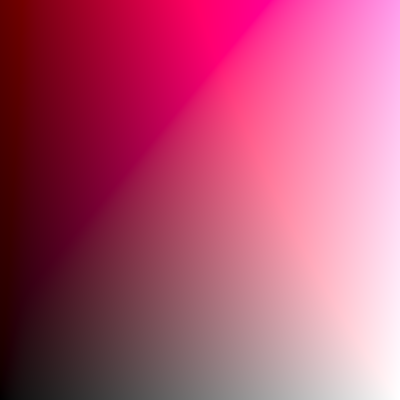

In [5]:
using MarkdownLiteral 
MarkdownLiteral.@markdown("""
Info
========
<img src="$(data_url(f))"/>

- txt1
- text2 
""")

In [7]:
using Interact

WebIO._IJuliaInit()

In [8]:
@manipulate for col=1:100
    f = createImage(sweep(col))
    f
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["col"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 100, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
50, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/nehal/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/nehal/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/nehal/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/nehal/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/nehal/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000115c28010, Task (runnable) @0x0000000115c28010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\

In [9]:
int_slider = slider(1:10)

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 10, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 1 listeners. Value:
5, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "/Users/nehal/.julia/packages/Knockout/3gjS1/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/nehal/.julia/packages/Knockout/3gjS1/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/nehal/.julia/packages/InteractBase/h8Fwe/src/../assets/all.js"), Asset("css", nothing, "/Users/nehal/.julia/packages/InteractBase/h8Fwe/src/../assets/style.css"), Asset("css", nothing, "/Users/nehal/.julia/packages/Interact/pVyN2/src/../assets/bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000114120d30, Task (runnable) @0x0000000114120d30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"3572068880041396408\",\"id\":\"13605377180684860181\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"3572068880041396408\",\"id\":\"3027345142048869251\",\"type\

In [10]:
int_slider[]

5